In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')



# 1. Датасет + Первичный анализ данных
* В своем проекте я буду исследовать данные по распространению Covid-19 в первую волну в России.
* Датасет я взял отсюда: https://www.kaggle.com/kapral42/covid19-russia-regions-cases?select=covid19-russia-cases-scrf.csv
* Данные есть с начала марта по конец июля 2020 года.


**Данные брались из официального источника по заболеваемости Covid-19: https://rospotrebnadzor.ru/about/info/news/**

**Описание данных:**
* 1) Date - дата
* 2) Region/City - Название города или региона РФ
* 3) Region/City-ENG - Название города или региона РФ на английском языке
* 4) Region_ID - уникальный идентефикатор региона
* 5) Day-Confirmed - количество подвержденных случаев в данный день
* 6) Day-Deaths - количество смертей в данный день
* 7) Day-Recovered - количество выздоравлений в данный день
* 8) Day-Confirmed - общее количество подвержденных случаев на данный день
* 9) Day-Deaths - общее количество смертей на данный день
* 10) Day-Recovered - общее количество выздоравлений на данный день

**Цель проекта:** 

* Изучить процесс распространения вирусы в первую волну пандемии в России

* Сравнить распространение инфекции в разные месяцы первой волны пандемии в России

* Сравнить распространение инфекции в Москве и в регионах


In [2]:
data = pd.read_csv('covid19-russia-cases-scrf.csv')
data

,Date,Region/City,Region/City-Eng,Region_ID,Day-Confirmed,Day-Deaths,Day-Recovered,Confirmed,Deaths,Recovered
0,2020-03-02,Московская область,Moscow region,50.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2020-03-03,Московская область,Moscow region,50.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2020-03-04,Московская область,Moscow region,50.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2020-03-05,Московская область,Moscow region,50.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2020-03-06,Москва,Moscow,77.0,5.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12049,2020-07-31,Ханты-Мансийский АО,Khanty-Mansiysk,86.0,171.0,0.0,338.0,16333.0,128.0,12790.0
12050,2020-07-31,Челябинская область,Chelyabinsk region,74.0,117.0,1.0,251.0,11197.0,93.0,6686.0
12051,2020-07-31,Чеченская Республика,Chechen Republic,95.0,14.0,0.0,6.0,2060.0,32.0,1363.0
12052,2020-07-31,Ямало-Ненецкий АО,Yamalo-Nenets Autonomous Okrug,89.0,112.0,0.0,392.0,11016.0,77.0,8023.0


# 2. Предобработка данных 

**Для начала создадим 2 таблицы - таблица со статистикой по Москве и таблица со статистикой по остальным регионам.**

**Так как в исследовании важен процесс распространения вируса, то нам нужны всего четыре поля:**
* 1) Date - дата
* 2) Day-Confirmed - количество подвержденных случаев в данный день
* 3) Day-Deaths - количество смертей в данный день
* 4) Day-Recovered - количество выздоравлений в данный день

In [3]:
moscow_data = data[data['Region_ID'] == 77]
moscow_data = moscow_data.drop(['Region/City','Region/City-Eng','Region_ID','Confirmed','Deaths','Recovered'], axis = 1)
moscow_data

,Date,Day-Confirmed,Day-Deaths,Day-Recovered
4,2020-03-06,5.0,0.0,0.0
8,2020-03-07,0.0,0.0,0.0
15,2020-03-08,0.0,0.0,0.0
22,2020-03-09,3.0,0.0,0.0
29,2020-03-10,3.0,0.0,0.0
...,...,...,...,...
11662,2020-07-27,694.0,13.0,264.0
11746,2020-07-28,674.0,10.0,827.0
11830,2020-07-29,671.0,13.0,625.0
11915,2020-07-30,678.0,12.0,1471.0


In [4]:
region_data = data[data['Region_ID'] != 77]
region_data = region_data.drop(['Region/City','Region/City-Eng','Region_ID','Confirmed','Deaths','Recovered'], axis = 1)
region_data = region_data.groupby('Date').sum()
region_data

,Day-Confirmed,Day-Deaths,Day-Recovered
Date,,,
2020-03-02,1.0,0.0,0.0
2020-03-03,0.0,0.0,0.0
2020-03-04,0.0,0.0,0.0
2020-03-05,0.0,0.0,0.0
2020-03-06,1.0,0.0,0.0
...,...,...,...
2020-07-27,4941.0,72.0,2799.0
2020-07-28,4721.0,140.0,8042.0
2020-07-29,4804.0,156.0,7444.0


**Заметим, что по регионам у нас есть данные со 2 марта, а по Москве - с 6 марта. При этом в дни со 2 по 5 мая в в регионах был выявлен всего один случай Covid-19. Поэтому из таблицы можно удалить данные по этим дням**

In [5]:
region_data = region_data.iloc[4::]
region_data

,Day-Confirmed,Day-Deaths,Day-Recovered
Date,,,
2020-03-06,1.0,0.0,0.0
2020-03-07,4.0,0.0,0.0
2020-03-08,3.0,0.0,0.0
2020-03-09,0.0,0.0,0.0
2020-03-10,0.0,0.0,0.0
...,...,...,...
2020-07-27,4941.0,72.0,2799.0
2020-07-28,4721.0,140.0,8042.0
2020-07-29,4804.0,156.0,7444.0


**Итак, получили таблицы, на основе которых будем далее проводить сравнение пандемии в Москве и регионах. Также, нам будут нужна таблица со статистикой по всей России**

In [6]:
russia_data = data.drop(['Region/City','Region/City-Eng','Region_ID','Confirmed','Deaths','Recovered'], axis = 1)
russia_data = russia_data.groupby('Date').sum()
russia_data = russia_data.iloc[4::]
russia_data

,Day-Confirmed,Day-Deaths,Day-Recovered
Date,,,
2020-03-06,6.0,0.0,0.0
2020-03-07,4.0,0.0,0.0
2020-03-08,3.0,0.0,0.0
2020-03-09,3.0,0.0,0.0
2020-03-10,3.0,0.0,0.0
...,...,...,...
2020-07-27,5635.0,85.0,3063.0
2020-07-28,5395.0,150.0,8869.0
2020-07-29,5475.0,169.0,8069.0


**На данный момент даты представляют из себя строки, а также являются индексом в таблицах. Исправим это, а также добавим поле месяц.**

In [7]:
russia_data.loc[:,"Date"] = list(map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").date(), russia_data.index))
russia_data.loc[:,"month"] = list(map(lambda x: x.month, russia_data["Date"].values))
russia_data.index = np.arange(148)
russia_data

,Day-Confirmed,Day-Deaths,Day-Recovered,Date,month
0,6.0,0.0,0.0,2020-03-06,3
1,4.0,0.0,0.0,2020-03-07,3
2,3.0,0.0,0.0,2020-03-08,3
3,3.0,0.0,0.0,2020-03-09,3
4,3.0,0.0,0.0,2020-03-10,3
...,...,...,...,...,...
143,5635.0,85.0,3063.0,2020-07-27,7
144,5395.0,150.0,8869.0,2020-07-28,7
145,5475.0,169.0,8069.0,2020-07-29,7
146,5509.0,129.0,9310.0,2020-07-30,7


In [8]:
region_data.loc[:,"Date"] = list(map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").date(), region_data.index))
region_data.loc[:,"month"] = list(map(lambda x: x.month, region_data["Date"].values))
region_data.index = np.arange(148)
region_data

,Day-Confirmed,Day-Deaths,Day-Recovered,Date,month
0,1.0,0.0,0.0,2020-03-06,3
1,4.0,0.0,0.0,2020-03-07,3
2,3.0,0.0,0.0,2020-03-08,3
3,0.0,0.0,0.0,2020-03-09,3
4,0.0,0.0,0.0,2020-03-10,3
...,...,...,...,...,...
143,4941.0,72.0,2799.0,2020-07-27,7
144,4721.0,140.0,8042.0,2020-07-28,7
145,4804.0,156.0,7444.0,2020-07-29,7
146,4831.0,117.0,7839.0,2020-07-30,7


In [9]:
moscow_data.loc[:,"Date"] = list(map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").date(), moscow_data['Date'].values))
moscow_data.loc[:,"month"] = list(map(lambda x: x.month, moscow_data["Date"].values))
moscow_data.index = np.arange(148)
moscow_data

,Date,Day-Confirmed,Day-Deaths,Day-Recovered,month
0,2020-03-06,5.0,0.0,0.0,3
1,2020-03-07,0.0,0.0,0.0,3
2,2020-03-08,0.0,0.0,0.0,3
3,2020-03-09,3.0,0.0,0.0,3
4,2020-03-10,3.0,0.0,0.0,3
...,...,...,...,...,...
143,2020-07-27,694.0,13.0,264.0,7
144,2020-07-28,674.0,10.0,827.0,7
145,2020-07-29,671.0,13.0,625.0,7
146,2020-07-30,678.0,12.0,1471.0,7


# 3. Визуальный анализ данных

**Посмотрим на то, как менялось количество новых случаев во всей России, в Москве и в регионах**

In [10]:
import matplotlib.ticker as ticker

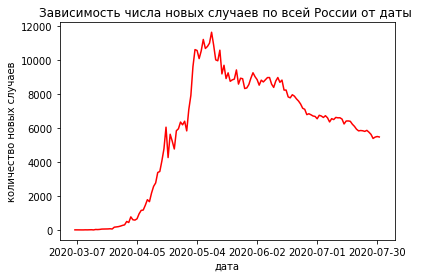

In [11]:
fig, ax = plt.subplots()

ax.plot(russia_data["Date"], russia_data["Day-Confirmed"], color='r')
#ax.grid()

ax.xaxis.set_major_locator(ticker.MultipleLocator(29))

ax.set_title('Зависимость числа новых случаев по всей России от даты ')

ax.set_xlabel('дата')
ax.set_ylabel('количество новых случаев')

plt.show()    

**Итак, можно обратить внимание, что наибольший пик приходился на первую половину мая. В марте заболеваемость была почти на нуле, в апреле был достаточно резкий рост, а начиная со второй половины мая - достаточно плавное падение. Далее посмотрим на аналогичные графики для Москвы и регионов**

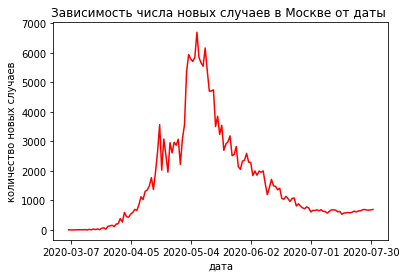

In [12]:
fig, ax = plt.subplots()

ax.plot(moscow_data["Date"], moscow_data["Day-Confirmed"], color='r')

ax.xaxis.set_major_locator(ticker.MultipleLocator(29))

ax.set_title('Зависимость числа новых случаев в Москве от даты ')

ax.set_xlabel('дата')
ax.set_ylabel('количество новых случаев')

plt.show()    

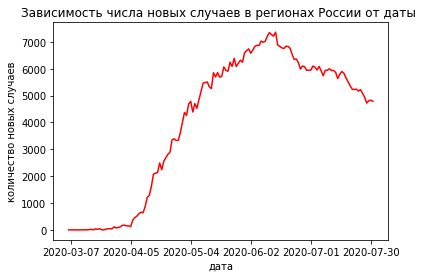

In [13]:
fig, ax = plt.subplots()

ax.plot(region_data["Date"], region_data["Day-Confirmed"], color='r')
#ax.grid()

ax.xaxis.set_major_locator(ticker.MultipleLocator(29))

ax.set_title('Зависимость числа новых случаев в регионах России от даты ')

ax.set_xlabel('дата')
ax.set_ylabel('количество новых случаев')

plt.show()    

**Итак, можно обратить внимание, что наибольший пик заболеваемости в Москве также приходится на начало мая. Однако далее в Москве происходит очень сильный спад. В то же время в регионах пик заболеваемости был в конце мая и в начале июня. Вот почему на графике заболеваемости по Всей России после прохождения пика падение получается очень медленным - в то время, как в Москве заболеваемость резко падала, в регионах она продолжала расти**

**Теперь построим аналогичные графики с количеством смертей и выздоравлений**

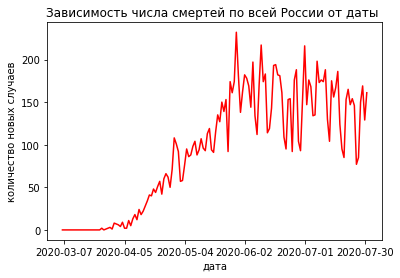

In [14]:
fig, ax = plt.subplots()

ax.plot(russia_data["Date"], russia_data["Day-Deaths"], color='r')
#ax.grid()

ax.xaxis.set_major_locator(ticker.MultipleLocator(29))

ax.set_title('Зависимость числа смертей по всей России от даты ')

ax.set_xlabel('дата')
ax.set_ylabel('количество новых случаев')

plt.show() 

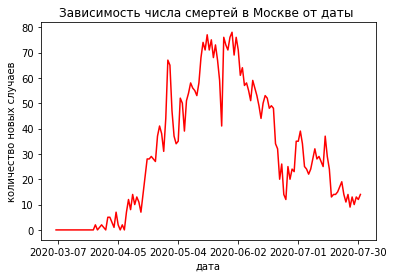

In [15]:
fig, ax = plt.subplots()

ax.plot(moscow_data["Date"], moscow_data["Day-Deaths"], color='r')

ax.xaxis.set_major_locator(ticker.MultipleLocator(29))

ax.set_title('Зависимость числа смертей в Москве от даты ')

ax.set_xlabel('дата')
ax.set_ylabel('количество новых случаев')

plt.show() 

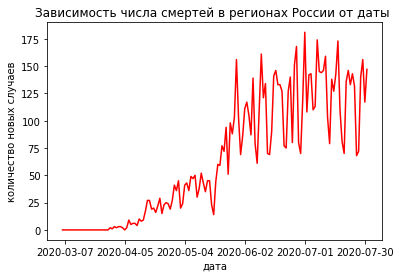

In [16]:
fig, ax = plt.subplots()

ax.plot(region_data["Date"], region_data["Day-Deaths"], color='r')
#ax.grid()

ax.xaxis.set_major_locator(ticker.MultipleLocator(29))

ax.set_title('Зависимость числа смертей в регионах России от даты ')

ax.set_xlabel('дата')
ax.set_ylabel('количество новых случаев')

plt.show()    

**Итак, можно заметить, что количествосво смертей в Москве росло до начала июня, после чего достаточно резко начало падать, а вот в регионах и по всей Росссии рост был не настолько резким, но и падения не произошло - с начала июня количество достаточно сильно колебалось**

**Теперь посмотрим на то, как менялось число выздоровевших людей**

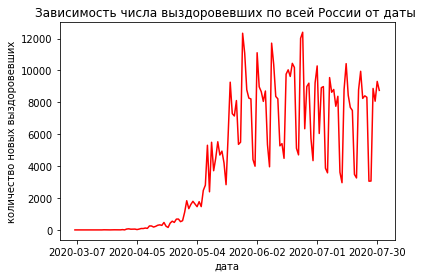

In [17]:
fig, ax = plt.subplots()

ax.plot(russia_data["Date"], russia_data["Day-Recovered"], color='r')
#ax.grid()

ax.xaxis.set_major_locator(ticker.MultipleLocator(29))

ax.set_title('Зависимость числа выздоровевших по всей России от даты ')

ax.set_xlabel('дата')
ax.set_ylabel('количество новых выздоровевших')

plt.show() 

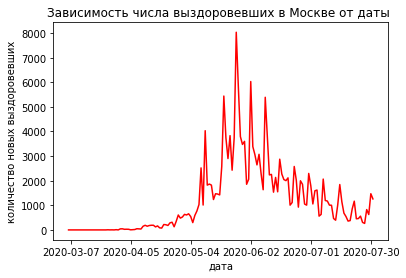

In [18]:
fig, ax = plt.subplots()

ax.plot(moscow_data["Date"], moscow_data["Day-Recovered"], color='r')

ax.xaxis.set_major_locator(ticker.MultipleLocator(29))

ax.set_title('Зависимость числа выздоровевших в Москве от даты ')

ax.set_xlabel('дата')
ax.set_ylabel('количество новых выздоровевших')

plt.show() 

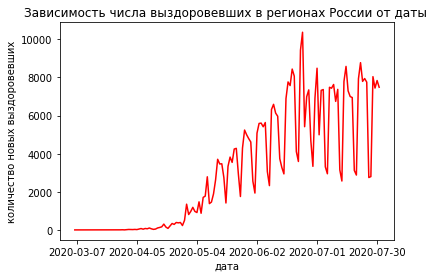

In [19]:
fig, ax = plt.subplots()

ax.plot(region_data["Date"], region_data["Day-Recovered"], color='r')
#ax.grid()

ax.xaxis.set_major_locator(ticker.MultipleLocator(29))

ax.set_title('Зависимость числа выздоровевших в регионах России от даты ')

ax.set_xlabel('дата')
ax.set_ylabel('количество новых выздоровевших')

plt.show()

**Число выздоровевших людей в Москве было максимально в начале июня - что логично, учитывая, что как раз прошло около месяца после пика по заболеваемости. После этого число начало убывать, так как и заражений стало меньше. А вот ситуация в регионах и всей остальной части России отличается от ситуации в Москве: число выздоравлений там имеет достаточно сильные колебания и остается примерно на одном уровне в июне и июле**

**Выводы**
* 1) Пик заболеваемости в Москве пришелся на начало мая, в то время как в регионах он наступил лишь в начале июня
* 2) Если в Москве после пика началось резкое падение, то в регионах падение было достаточно медленным. Думаю, это связано с тем, что в Москве делали намного намного больше тестов, чем в регионах, а также лучше следили , чтобы зараженные люди посидели дома какое-то время
* 3) Можно заметить, что спустя какое-то время после пика число смертей в Москве стало сильно падать, а вот в регионах даже после пика оно было достаточно большим и четкого падения не наблюдалось. Это связано с тем, что медицина в Москве на более высоком уровне: когда было подготовлено достатчное количество больничных мест, то очень многих людей стало возможно спасти, а вот в регионах ситуация несколько хуже, поэтому число смертей там все еще оставалось достаточно большим


**Далее посмотрим , как менялось число новых заболевших в разные месяцы**

In [20]:
russia_month = russia_data.groupby('month').sum()
russia_month

,Day-Confirmed,Day-Deaths,Day-Recovered
month,,,
3,2336.0,17.0,121.0
4,104161.0,1056.0,11498.0
5,299345.0,3620.0,160264.0
6,242006.0,4627.0,240767.0
7,192132.0,4643.0,225761.0


<BarContainer object of 5 artists>

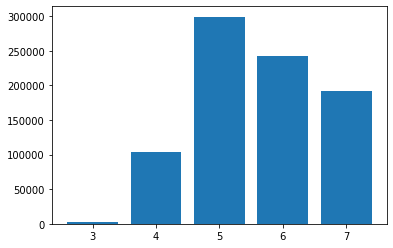

In [21]:
plt.bar(russia_month.index, russia_month["Day-Confirmed"].values)

**Заметим, что наибольшее число выявленных случае было в мае - то есть когда пик заболеваемости в Москве уже почти прошел, а в России еще не наступил**

In [22]:
moscow_month = moscow_data.groupby('month').sum()
moscow_month

,Day-Confirmed,Day-Deaths,Day-Recovered
month,,,
3,1613.0,11.0,70.0
4,52126.0,600.0,5065.0
5,127052.0,1866.0,75044.0
6,40807.0,1319.0,70218.0
7,19761.0,664.0,28771.0


<BarContainer object of 5 artists>

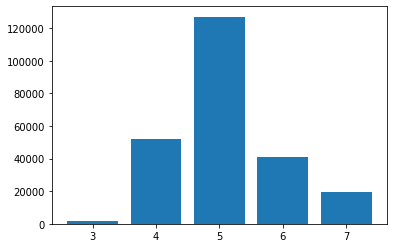

In [23]:
plt.bar(moscow_month.index, moscow_month["Day-Confirmed"].values)

**Можно заметить, что в июня случаев заражения в Москве было выявлено даже меньше, чем в апреле, а в Мае было выявлено больше, чем за другие 4 месяца вмесое взятые**

In [24]:
region_month = region_data.groupby('month').sum()
region_month

,Day-Confirmed,Day-Deaths,Day-Recovered
month,,,
3,723.0,6.0,51.0
4,52035.0,456.0,6433.0
5,172293.0,1754.0,85220.0
6,201199.0,3308.0,170549.0
7,172371.0,3979.0,196990.0


<BarContainer object of 5 artists>

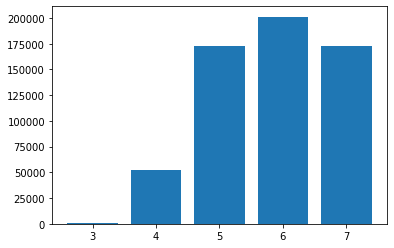

In [25]:
plt.bar(region_month.index, region_month["Day-Confirmed"].values)

**Итак, видно, что пик действительно был в июне, однако в июле ситуация не стала сильно лучше. Заболеваемость была все еще на высоком уровне, в то время, как в Москве в июле число новых случае было крайне низким.**

**Посмотрим на то, как обстояло дело со смерятми**

<BarContainer object of 5 artists>

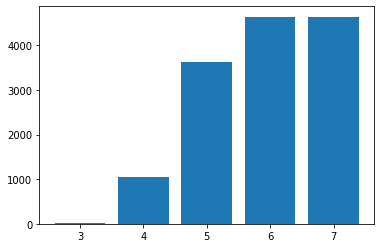

In [26]:
plt.bar(russia_month.index, russia_month["Day-Deaths"].values)

<BarContainer object of 5 artists>

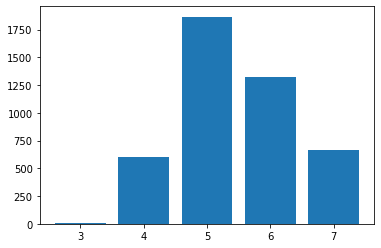

In [27]:
plt.bar(moscow_month.index, moscow_month["Day-Deaths"].values)

<BarContainer object of 5 artists>

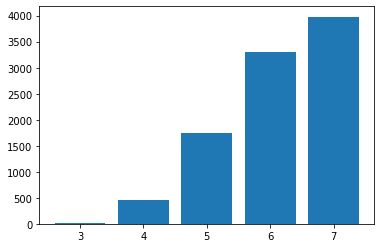

In [28]:
plt.bar(region_month.index, region_month["Day-Deaths"].values)

**Пик количества смертей в Москве совпал с пиком распостранения инфекции - это май. А вот в регионах пик забоелваемости был в июне, а пик смертности - в июле. По всей России число смертей в июне и июле было примерно одно и то же**

**Выводы**
* 1) Пик смертности и заболеваемости в Москве совпали, а в регионах - пик смертности был через месяц после пика заболеваемости.
* 2) В летние месяцы, когда многие уехали из Москвы, ситуация с заболеваемостью там значительно улучшилась, число заболевших было даже ниже, чем в апреле. А вот в регионах летом ситуация была даже напряженнее, чем весной


# 4. Проверка статистических гипотез 

**Гипотеза 1. Число смертей в сутки в июне и июле в России совпадала** 

**H0 :  число смертей в сутки совпадает**

**H1 :  число смертей в сутки различается**

In [29]:
russia_data

,Day-Confirmed,Day-Deaths,Day-Recovered,Date,month
0,6.0,0.0,0.0,2020-03-06,3
1,4.0,0.0,0.0,2020-03-07,3
2,3.0,0.0,0.0,2020-03-08,3
3,3.0,0.0,0.0,2020-03-09,3
4,3.0,0.0,0.0,2020-03-10,3
...,...,...,...,...,...
143,5635.0,85.0,3063.0,2020-07-27,7
144,5395.0,150.0,8869.0,2020-07-28,7
145,5475.0,169.0,8069.0,2020-07-29,7
146,5509.0,129.0,9310.0,2020-07-30,7


In [30]:
june_death_region = russia_data[region_data["month"] == 6]["Day-Deaths"].values
july_death_region = russia_data[region_data["month"] == 7]["Day-Deaths"].values

**Воспользуемся критерием Стьюдента для несвязанных выборок**

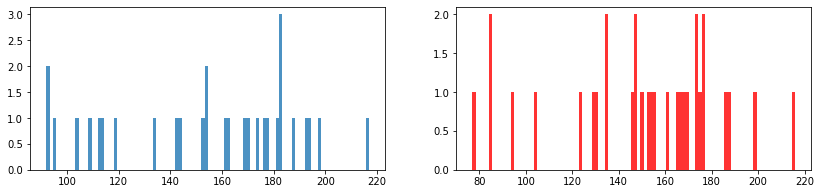

In [31]:
fig = plt.figure(figsize=(14, 3))
ax1 = plt.subplot(121)
plt.hist(june_death_region, 100, alpha=0.8)

ax1 = plt.subplot(122)
plt.hist(july_death_region, 100, alpha=0.8, color = 'r')

plt.show()

**Видим, что у нас нет нормального распределения, поэтому воспользуемся bootstrap-ом**

In [32]:
from sklearn.utils import resample

In [33]:
june_distribution = []
july_distribution = []

for i in range(1000):
    sample_june = resample(june_death_region, replace=True, n_samples=10, random_state=i)
    sample_july = resample(july_death_region, replace=True, n_samples=10, random_state=i)
    
    june_distribution.append(np.mean(sample_june))
    july_distribution.append(np.mean(sample_july))

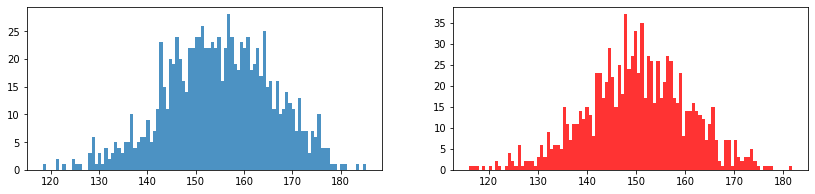

In [34]:
fig = plt.figure(figsize=(14, 3))
ax1 = plt.subplot(121)
plt.hist(june_distribution, 100, alpha=0.8)

ax1 = plt.subplot(122)
plt.hist(july_distribution, 100, alpha=0.8, color = 'r')

plt.show()

**вот теперь можно применить критерий Стьюдента**

In [35]:
from scipy import stats

In [36]:
t, p = stats.ttest_ind(june_distribution, july_distribution )  

In [37]:
t, p

(9.837081781569443, 2.4829777220457593e-22)

**Итак, видим, что мы не можем принять нулевую гипотезу о совпадении смертности за сутки в регионах в июне и июле, р < 0.05. То есть несмотря на то, что общее число смертей в июне и июле в России совпадало, среднее число смертей в сутки - нет**

**Теперь проверим эту же гипотезу с помощью непараметрического критерия  Манна-Уитни**

In [38]:
stats.mannwhitneyu(june_distribution, july_distribution)

MannwhitneyuResult(statistic=376763.5, pvalue=6.905048926435956e-22)

**Итак, мы вновь получаем, что не можем принять нашу гипотезу**

**Гипотеза 2. Ежедневный прирост в апреле совпал в Москве и в регионах** 

**H0 : Ежедневный прирост совпадает**

**H1 :  Ежедневный прирост различается**

In [39]:
moscow_april = moscow_data[moscow_data["month"] == 4]
moscow_april = moscow_april["Day-Confirmed"].values
moscow_april

array([ 267.,  595.,  448.,  434.,  536.,  591.,  697.,  660.,  857.,
       1124., 1030., 1306., 1355., 1489., 1774., 1370., 1959., 2649.,
       3570., 2026., 3083., 2548., 1959., 2957., 2612., 2971., 2871.,
       3075., 2220., 3093.])

In [40]:
region_april = region_data[region_data["month"] == 4]
region_april = region_april["Day-Confirmed"].values
region_april

array([ 173.,  176.,  153.,  148.,  122.,  363.,  457.,  515.,  602.,
        662.,  637.,  869., 1214., 1285., 1614., 2078., 2111., 2136.,
       2490., 2242., 2559., 2688., 2815., 2892., 3354., 3390., 3327.,
       3336., 3621., 4006.])

**вновь воспользуемся Критерием Стьюдента для бутстрапированных выборок**

In [41]:
moscow_distribution = []
region_distribution = []

for i in range(1000):
    sample_moscow = resample(moscow_april, replace=True, n_samples=10, random_state=i)
    sample_region = resample(region_april, replace=True, n_samples=10, random_state=i)
    
    moscow_distribution.append(np.mean(sample_moscow))
    region_distribution.append(np.mean(sample_region))

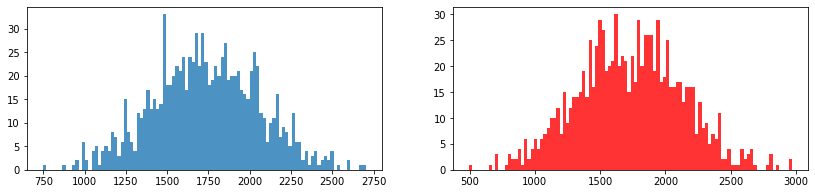

In [42]:
fig = plt.figure(figsize=(14, 3))
ax1 = plt.subplot(121)
plt.hist(moscow_distribution, 100, alpha=0.8)

ax1 = plt.subplot(122)
plt.hist(region_distribution, 100, alpha=0.8, color = 'r')

plt.show()

In [43]:
t, p = stats.ttest_ind(moscow_distribution, region_distribution )  
t, p

(0.38741394672749724, 0.6984910442180317)

**Так как вероятность вышла > 0.05, то мы не можем отклонить нашу гипотезу. Значит ежедневный прирост заболеваемости в Москве и в регионах в апреле совпадал**

**Теперь воспользуемся непараметрическим критерием Манна-Уитни и проверим, совпадет ли результат**

In [44]:
stats.mannwhitneyu(moscow_distribution, region_distribution)

MannwhitneyuResult(statistic=494893.0, pvalue=0.34625579034989734)

**Снова получили, что мы не можем отклонить гипотезу. Итак, суточный прирост новых случае заражения covid-19 совпадал в апреле в Москве и в регионах**

**Гипотеза 3. Среднее число число заражений за сутки в июне и в июле в регионах России равно 6000** 

* H0 :  Среднее число число заражений за сутки равно 6000

* H1 :  Среднее число число заражений за сутки не равно 6000

In [45]:
mask = (region_data["month"] == 6) | (region_data["month"] == 7)

june_and_july_region = region_data[mask]["Day-Confirmed"].values
june_and_july_region

array([6738., 6577., 6694., 6833., 6871., 6863., 7028., 6984., 7023.,
       7209., 7343., 7273., 7213., 7358., 6887., 6832., 6778., 6750.,
       6836., 6832., 6760., 6532., 6344., 6365., 6228., 5987., 6102.,
       6074., 5937., 5948., 5945., 6098., 6059., 5952., 6086., 5926.,
       5739., 5941., 5941., 5998., 5933., 5936., 5865., 5635., 5794.,
       5897., 5831., 5656., 5518., 5362., 5240., 5224., 5240., 5166.,
       5223., 5082., 4941., 4721., 4804., 4831., 4787.])

**Для обоих критериев, которыми я буду пользоваться, нужна выборка с распределением, похожим на нормальное , значит используем bootstrap**

In [46]:
june_and_july_region_distribution = []

for i in range(1000):
    sample = resample(june_and_july_region, replace=True, n_samples=10, random_state=i)
    
    june_and_july_region_distribution.append(np.mean(sample))

**Воспользуемся критерием знаков рангов Уилкоксона**

In [47]:
m0 = 6000
stats.wilcoxon(np.array(june_and_july_region_distribution) - m0)

WilcoxonResult(statistic=102350.0, pvalue=5.9819553971676225e-59)

**Итак, согласно этому критерию мы не можем принять нулевую гипотезу**

**Теперь воспользуемся одновыборочгым критерием Стьюдента**

In [48]:
stats.ttest_1samp(a = june_and_july_region_distribution , popmean = m0)

Ttest_1sampResult(statistic=18.436563819396234, pvalue=1.4778385275669357e-65)

**Аналогичный результат. Принять нулевую гипотезу мы не можем**

**Выводы**

* Мы не можем принять гипотезу о том, что средняя смерность за сутки в июне и июле по регионам России совпадает
* Мы не можем отклонить гипотезу о том, что ежедневный прирост заболевших в апреле совпадал в Москве и в регионах
* Мы не можем принять гипотезу о том, что  среднее число зараженных за сутки равно 6000 в регионах в июне и июле

# 5. Предсказание временного ряда

**Сначала попробуем предсказать количество заражений на самую последнюю неделю июля - данные по ней у нас есть. Выберем, каким способом получается лучшее качество**
**после чего построим предсказание на первую неделю августа**

**1. Для Москвы** 

In [49]:
moscow_data_train = moscow_data.iloc[:-7:]
moscow_data_train

,Date,Day-Confirmed,Day-Deaths,Day-Recovered,month
0,2020-03-06,5.0,0.0,0.0,3
1,2020-03-07,0.0,0.0,0.0,3
2,2020-03-08,0.0,0.0,0.0,3
3,2020-03-09,3.0,0.0,0.0,3
4,2020-03-10,3.0,0.0,0.0,3
...,...,...,...,...,...
136,2020-07-20,578.0,15.0,379.0,7
137,2020-07-21,602.0,17.0,853.0,7
138,2020-07-22,638.0,19.0,1168.0,7
139,2020-07-23,608.0,14.0,453.0,7


In [50]:
moscow_data_val = moscow_data.iloc[-7::]
moscow_data_val

,Date,Day-Confirmed,Day-Deaths,Day-Recovered,month
141,2020-07-25,648.0,14.0,561.0,7
142,2020-07-26,683.0,9.0,306.0,7
143,2020-07-27,694.0,13.0,264.0,7
144,2020-07-28,674.0,10.0,827.0,7
145,2020-07-29,671.0,13.0,625.0,7
146,2020-07-30,678.0,12.0,1471.0,7
147,2020-07-31,695.0,14.0,1260.0,7


**Для начала попробуем экспоненциальное сглаживание**

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [52]:
from sklearn.metrics import mean_absolute_error

In [53]:
res = []
vals = moscow_data_train["Day-Confirmed"].values 
sl = [0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.16, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for s in sl:
    fit = SimpleExpSmoothing(vals).fit(smoothing_level=s, optimized=False)
    res.append(mean_absolute_error(fit.forecast(7), moscow_data_val["Day-Confirmed"].values))

In [54]:
ind = np.argmin(np.array(res))
ind, res[ind]

(3, 23.969819530562727)

In [55]:
res = []
vals = moscow_data_train["Day-Confirmed"].values 
sl = [0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.16, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ss = [0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.16, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for s1 in ss:
    for s2 in sl:
        fit = Holt(vals).fit(smoothing_level = s2, smoothing_slope = s1)
        res.append([s1,s2,mean_absolute_error(fit.forecast(7), moscow_data_val["Day-Confirmed"].values)])

In [56]:
res_score = list(map(lambda x: x[2], res))
ind = np.argmin(np.array(res_score))
ind, res[ind]

(143, [0.2, 0.9, 11.355356742784434])

**Итак, пока что самый лучший результат - двойное экспоненциальное сглаживание с параметрами smoothing_level = 0.9, smoothing_slope = 0.2)**

In [57]:
fit = Holt(vals).fit(smoothing_level = 0.9, smoothing_slope = 0.2)
mean_absolute_error(fit.forecast(7), moscow_data_val["Day-Confirmed"].values)

11.355356742784434

**Теперь попробуем линейную модель**

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
moscow_data_train["label"] = "train"
moscow_data_val["label"] = "test"
moscow_full = pd.concat([moscow_data_train, moscow_data_val])
moscow_full

,Date,Day-Confirmed,Day-Deaths,Day-Recovered,month,label
0,2020-03-06,5.0,0.0,0.0,3,train
1,2020-03-07,0.0,0.0,0.0,3,train
2,2020-03-08,0.0,0.0,0.0,3,train
3,2020-03-09,3.0,0.0,0.0,3,train
4,2020-03-10,3.0,0.0,0.0,3,train
...,...,...,...,...,...,...
143,2020-07-27,694.0,13.0,264.0,7,test
144,2020-07-28,674.0,10.0,827.0,7,test
145,2020-07-29,671.0,13.0,625.0,7,test
146,2020-07-30,678.0,12.0,1471.0,7,test


In [60]:
features = []
for period_mult in range(1,3,1):
    moscow_full["lag_period_{}".format(period_mult)] = moscow_full["Day-Confirmed"].shift(period_mult)
    features.append("lag_period_{}".format(period_mult))


moscow_full['lagf_mean'] = moscow_full[features].mean(axis = 1)

features.extend(['lagf_mean'])

In [61]:
df = moscow_full
df

,Date,Day-Confirmed,Day-Deaths,Day-Recovered,month,label,lag_period_1,lag_period_2,lagf_mean
0,2020-03-06,5.0,0.0,0.0,3,train,NaN,NaN,NaN
1,2020-03-07,0.0,0.0,0.0,3,train,5.0,NaN,5.0
2,2020-03-08,0.0,0.0,0.0,3,train,0.0,5.0,2.5
3,2020-03-09,3.0,0.0,0.0,3,train,0.0,0.0,0.0
4,2020-03-10,3.0,0.0,0.0,3,train,3.0,0.0,1.5
...,...,...,...,...,...,...,...,...,...
143,2020-07-27,694.0,13.0,264.0,7,test,683.0,648.0,665.5
144,2020-07-28,674.0,10.0,827.0,7,test,694.0,683.0,688.5
145,2020-07-29,671.0,13.0,625.0,7,test,674.0,694.0,684.0
146,2020-07-30,678.0,12.0,1471.0,7,test,671.0,674.0,672.5


In [62]:
model = LinearRegression()
train_df = df[df.label == 'train'][features + ['Day-Confirmed']].dropna()
test_df = df[df.label == 'test'][features]

model.fit(train_df.drop('Day-Confirmed', axis = 1) ,train_df['Day-Confirmed'])
forecast = model.predict(test_df)
mean_absolute_error(forecast, moscow_data_val["Day-Confirmed"].values)

23.246808091164798

**Я попробовал разное число лаговых фичей  - и результат всегда получается хуже, чем при двойном экспоненциальном сглаживании. Поэтому буду использовать его**

**Сделаем прогноз на первую неделю августа**

In [63]:
moscow_day_conf = moscow_data["Day-Confirmed"].values
fit = Holt(moscow_day_conf).fit(smoothing_level = 0.9, smoothing_slope = 0.2)
fit.forecast(7)

array([700.4767848 , 707.22295671, 713.96912862, 720.71530053,
       727.46147244, 734.20764435, 740.95381626])

**2. Для регионов** 

In [64]:
region_data_train = region_data.iloc[:-7:]
region_data_train

,Day-Confirmed,Day-Deaths,Day-Recovered,Date,month
0,1.0,0.0,0.0,2020-03-06,3
1,4.0,0.0,0.0,2020-03-07,3
2,3.0,0.0,0.0,2020-03-08,3
3,0.0,0.0,0.0,2020-03-09,3
4,0.0,0.0,0.0,2020-03-10,3
...,...,...,...,...,...
136,5362.0,70.0,2879.0,2020-07-20,7
137,5240.0,136.0,7929.0,2020-07-21,7
138,5224.0,146.0,8777.0,2020-07-22,7
139,5240.0,133.0,7794.0,2020-07-23,7


In [65]:
region_data_val = region_data.iloc[-7::]
region_data_val

,Day-Confirmed,Day-Deaths,Day-Recovered,Date,month
141,5223.0,132.0,7755.0,2020-07-25,7
142,5082.0,68.0,2749.0,2020-07-26,7
143,4941.0,72.0,2799.0,2020-07-27,7
144,4721.0,140.0,8042.0,2020-07-28,7
145,4804.0,156.0,7444.0,2020-07-29,7
146,4831.0,117.0,7839.0,2020-07-30,7
147,4787.0,147.0,7487.0,2020-07-31,7


**проведем аналогичные эксперименты, как в случае с Москвой и выберем лучший метод**

In [66]:
res = []
vals = region_data_train["Day-Confirmed"].values 
sl = [0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.16, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for s in sl:
    fit = SimpleExpSmoothing(vals).fit(smoothing_level=s, optimized=False)
    res.append(mean_absolute_error(fit.forecast(7), region_data_val["Day-Confirmed"].values))

In [67]:
ind = np.argmin(np.array(res))
ind, res[ind]

(0, 226.01720029432818)

In [68]:
res = []
vals = region_data_train["Day-Confirmed"].values 
sl = [0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.16, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ss = [0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.16, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for s1 in ss:
    for s2 in sl:
        fit = Holt(vals).fit(smoothing_level = s2, smoothing_slope = s1)
        res.append([s1,s2,mean_absolute_error(fit.forecast(7), region_data_val["Day-Confirmed"].values)])

In [69]:
res_score = list(map(lambda x: x[2], res))
ind = np.argmin(np.array(res_score))
ind, res[ind]

(89, [0.14, 0.3, 72.78629785838075])

In [70]:
region_data_train["label"] = "train"
region_data_val["label"] = "test"
region_full = pd.concat([region_data_train, region_data_val])
region_full

,Day-Confirmed,Day-Deaths,Day-Recovered,Date,month,label
0,1.0,0.0,0.0,2020-03-06,3,train
1,4.0,0.0,0.0,2020-03-07,3,train
2,3.0,0.0,0.0,2020-03-08,3,train
3,0.0,0.0,0.0,2020-03-09,3,train
4,0.0,0.0,0.0,2020-03-10,3,train
...,...,...,...,...,...,...
143,4941.0,72.0,2799.0,2020-07-27,7,test
144,4721.0,140.0,8042.0,2020-07-28,7,test
145,4804.0,156.0,7444.0,2020-07-29,7,test
146,4831.0,117.0,7839.0,2020-07-30,7,test


In [71]:
features = []
for period_mult in range(1,12,1):
    region_full["lag_period_{}".format(period_mult)] = region_full["Day-Confirmed"].shift(period_mult)
    features.append("lag_period_{}".format(period_mult))


region_full['lagf_mean'] = region_full[features].mean(axis = 1)

features.extend(['lagf_mean'])

In [72]:
df = region_full
df

,Day-Confirmed,Day-Deaths,Day-Recovered,Date,month,label,lag_period_1,lag_period_2,lag_period_3,lag_period_4,lag_period_5,lag_period_6,lag_period_7,lag_period_8,lag_period_9,lag_period_10,lag_period_11,lagf_mean
0,1.0,0.0,0.0,2020-03-06,3,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,0.0,0.0,2020-03-07,3,train,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2,3.0,0.0,0.0,2020-03-08,3,train,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000
3,0.0,0.0,0.0,2020-03-09,3,train,3.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.666667
4,0.0,0.0,0.0,2020-03-10,3,train,0.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,4941.0,72.0,2799.0,2020-07-27,7,test,5082.0,5223.0,5166.0,5240.0,5224.0,5240.0,5362.0,5518.0,5656.0,5831.0,5897.0,5403.545455
144,4721.0,140.0,8042.0,2020-07-28,7,test,4941.0,5082.0,5223.0,5166.0,5240.0,5224.0,5240.0,5362.0,5518.0,5656.0,5831.0,5316.636364
145,4804.0,156.0,7444.0,2020-07-29,7,test,4721.0,4941.0,5082.0,5223.0,5166.0,5240.0,5224.0,5240.0,5362.0,5518.0,5656.0,5215.727273
146,4831.0,117.0,7839.0,2020-07-30,7,test,4804.0,4721.0,4941.0,5082.0,5223.0,5166.0,5240.0,5224.0,5240.0,5362.0,5518.0,5138.272727


In [73]:
model = LinearRegression()
train_df = df[df.label == 'train'][features + ['Day-Confirmed']].dropna()
test_df = df[df.label == 'test'][features]

model.fit(train_df.drop('Day-Confirmed', axis = 1) ,train_df['Day-Confirmed'])
forecast = model.predict(test_df)
mean_absolute_error(forecast, region_data_val["Day-Confirmed"].values)

73.67646868312931

**Для регионов лучший результат вновь получился с двойным экспоненциальным сглаживанием с параметрами 0.14 и 0.3 . Попробуем использовать его для предсказания на первую неделю августа**

In [74]:
region_day_conf = region_data["Day-Confirmed"].values
fit = Holt(region_day_conf).fit(smoothing_level = 0.3, smoothing_slope = 0.14)
fit.forecast(7)

array([4660.1441976 , 4596.30495163, 4532.46570567, 4468.62645971,
       4404.78721375, 4340.94796779, 4277.10872183])

# 6. Выводы 

**Итак, проведено исследование статистики в первую волну пандемии в России. Можно сделать некоторые выводы**
* В апреле рост заболеваемости в Москве был на уровне всех остальных регионов России вместе взятых
* Несмотря на то, что суммарное из июнь и июль число смертей было равным, среднесуточный прирост все же был разный. 
* По предсказанию можно сделать вывод, что в начале августа заболеваемость в Москве должна была немного вырасти, а вот в регионах немного опуститься. 
* Пик в первую волну в Москве был в начале мая, после чего забоелваемость резко пошла на спад, в то время как в регионах пик наступил в начале июня, однако после этого не последовало такого же резкого падения, как в Москве
* Смертность в Москве стала очень сильно падать после пика, а вот в регионах она продолжила расти даже после прохождения пика заболевамости
